# Fit Parametric Copula
The purpose of this notebook is to find the best fitting Copula. The overall strategy is to maximize the likelihood. (However, there are hypothesis testing type goodness of fit testing procedures are proposed, detail please refer to )


## Fitting Marginals
First, we fit the data to different distributions to obtain the best fitting distributions' paramters. Then, we compute the KS statistis of each distributions and pick the best one to proceed. 

In [2]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

,Unnamed: 0,Last Price_btc,Open Price_btc,High Price_btc,Low Price_btc,BTC1 Curncy - Volume,Last Price_brr,Open Price_brr,High Price_brr,Low Price_brr,price_crix,return_btc,return_brr,return_crix
0,2020-09-04,10480,10730.0,10740.0,10355.0,13711.0,10273.83,10273.83,10273.83,10273.83,29614.314902,-0.022642,-0.056452,-0.109754
1,2020-09-03,10720,11710.0,11710.0,10840.0,15412.0,10870.49,10870.49,10870.49,10870.49,33049.664458,-0.066752,-0.040962,-0.046514
2,2020-09-02,11460,12405.0,12405.0,11530.0,17210.0,11325.01,11325.01,11325.01,11325.01,34623.237089,-0.052274,-0.046365,0.023061
3,2020-09-01,12075,12050.0,12450.0,12050.0,8919.0,11862.46,11862.46,11862.46,11862.46,33833.920615,0.020076,0.012073,-0.001434
4,2020-08-31,11835,11735.0,11915.0,11705.0,4865.0,11720.10,11720.10,11720.10,11720.10,33882.473739,0.017473,0.023398,0.033484


In [2]:
M = max(data.iloc[:,-1])
m = min(data.iloc[:,-1])
size = 3000
x = np.linspace(m, M, size)
dist_names = ['norm', 'lognorm', 't', 'laplace']

In [3]:
def fit_marginals(data, dist_names = ['norm', 'lognorm', 't', 'laplace']):
    dist_arr = []
    KS_arr = []
    param_arr = []
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        dist_arr.append(dist)
        param = dist.fit(data)
        param_arr.append(param)
        KS = st.kstest(data, dist_name, args=param)
        KS_arr.append(KS)
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
        plt.plot(x, pdf_fitted, label=dist_name)

    sns.distplot(data, label='empirical', kde=False)
    plt.yscale('log')
    plt.legend()
    return dist_names, dist_arr, KS_arr, param_arr

In [4]:
btc_result = fit_marginals(data.iloc[:,-3])
brr_result = fit_marginals(data.iloc[:,-2])
crix_result = fit_marginals(data.iloc[:,-1])

NameError: name 'st' is not defined

In [7]:
btc_result = fit_marginals(data.iloc[:,-3])

NameError: name 'st' is not defined

In [8]:
brr_result = fit_marginals(data.iloc[:,-2])

NameError: name 'st' is not defined

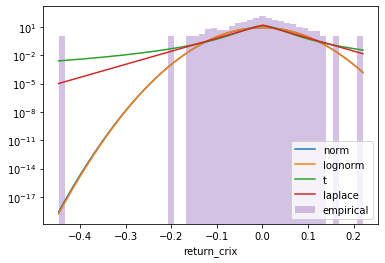

In [132]:
crix_result = fit_marginals(data.iloc[:,-1])

In [133]:
btc_KS = [round(result[0], 4) for result in btc_result[-2]]
brr_KS = [round(result[0], 4) for result in brr_result[-2]]
crix_KS = [round(result[0], 4) for result in crix_result[-2]]

btc_KS_pvalue = [round(result[1], 4) for result in btc_result[-2]]
brr_KS_pvalue = [round(result[1], 4) for result in brr_result[-2]]
crix_KS_pvalue = [round(result[1], 4) for result in crix_result[-2]]

In [134]:
KSs = pd.DataFrame({'btc':btc_KS, 'brr':brr_KS, 'crix':crix_KS}, index=dist_names).T
KS_pvalues = pd.DataFrame({'btc':btc_KS_pvalue, 'brr':brr_KS_pvalue, 'crix':crix_KS_pvalue}, index=dist_names).T

In [135]:
KSs.columns = ['KS' for _ in range(len(dist_names))]
KS_pvalues.columns = ['P-values' for _ in range(len(dist_names))]
KS_and_Pvalues = [pd.concat({'KS':KSs.iloc[:,i], "P-value":KS_pvalues.iloc[:,i]},axis=1) for i in range(len(dist_names))]
pd.concat(dict([(dist_names[i], KS_and_Pvalues[i]) for i in range(len(dist_names))]), axis=1)

laplace         lognorm            norm               t        
          KS P-value      KS P-value      KS P-value      KS P-value
btc   0.0314  0.5511  0.1046     0.0  0.1038     0.0  0.0207  0.9451
brr   0.0336  0.4565  0.1059     0.0  0.1058     0.0  0.0308  0.5785
crix  0.0224  0.9026  0.0911     0.0  0.0903     0.0  0.0342  0.4326

(['norm', 'lognorm', 't', 'laplace'],
 [KstestResult(statistic=0.10382871164902485, pvalue=1.6550125774364151e-06),
  KstestResult(statistic=0.10464926221740034, pvalue=1.3252244813972684e-06),
  KstestResult(statistic=0.020700240866094677, pvalue=0.9450768497178044),
  KstestResult(statistic=0.031356025722434844, pvalue=0.5510510759799622)],
 [(0.0003546211503368138, 0.04624166652589297),
  (0.0038988936949579025, -11.87580211198474, 11.876052589731195),
  (2.1322139303995824, 0.00024124137271071326, 0.024076557745693047),
  (-2.2948301267284272e-08, 0.03031928838257561)])

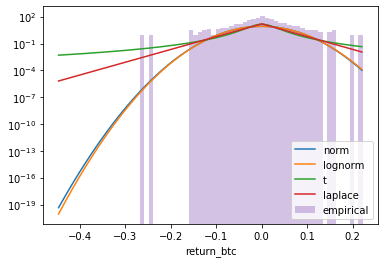

In [136]:
fit_marginals(data.iloc[:,-3])

Packham: Try Empirical Distribution as well, try double t and normal inverse gaussian


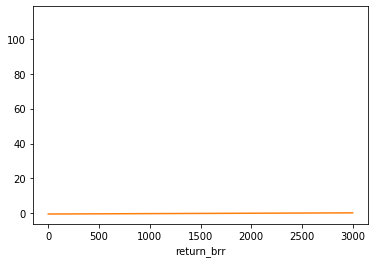

In [137]:
sns.distplot(data.iloc[:,-2], kde=False)

plt.plot(x, )

### Decisions
btc future: t distribution

btc reference rate: t distribution (but p-value is not satisfying)

crix reference rate: laplace distribution (but p-value is not satisfying)

## Fitting Copula

We will use the $\theta-\tau$ relationship to determine the parameter, and then calculate the corresponding likelihood. 

We are interested in two pairs of bivariate copula:
- brr, btc future, and
- crix, btc future

The link between $\tau$ and $\theta$ (Genest & Riverst, 1993)
- Clayton
$\tau = \theta/(\theta+2)$

- Frank
$ \tau = 1+ 4(D_1(\theta)-1)/\theta$, where $D_1$ is the Debye function of order 1

- Gumbel
$ \tau = \theta / (\theta+1)$

https://mediatum.ub.tum.de/doc/1119201/1119201.pdf

In [9]:
tau_1 = stats.kendalltau(data.return_brr, data.return_btc)[0]
tau_2 = stats.kendalltau(data.return_crix, data.return_btc)[0]

tau_1

0.5645552447104593

(-0.3, 0.3)

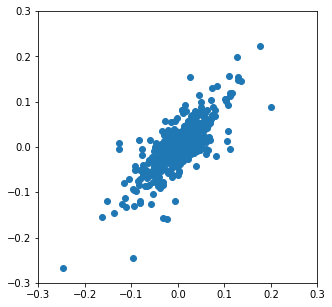

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(data.return_brr, data.return_btc)
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.3))

In [7]:
def Clayton_copula_density(u, v, theta):
    A = (1+theta)*((u*v)**(-1-theta))
    B = (-1+(u**-theta)+(v**-theta))**(-2-(1/theta))
    return A*B

def Gumbel_copula(u,v, theta):
    t1 = (-np.log(u))**theta
    t2 = (-np.log(v))**theta
    return np.exp((-(t1+t2))**(1/theta))

def Gumbel_copula_density(u,v, theta):
    t1 = (-np.log(u))**theta
    t2 = (-np.log(v))**theta
    A = (Gumbel_copula(u,v,theta)/(u*v))*(t1+t2)**(-2+2/theta)
    B = (np.log(u)*np.log(v))**(theta-1)
    C = 1+ (theta-1)*(t1+t2)**(-1/theta)
    return A*B*C

In [3]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

In [4]:
# Clayton
theta_clayton = 2*tau_1 / (1-tau_1)
theta_gumbel  = 1*tau_1 / (1-tau_1)

# u = brr_result[1][2].cdf(data.return_brr,df=brr_result[-1][2][0])
# v = btc_result[1][2].cdf(data.return_btc,df=btc_result[-1][2][0])

clayton_likelihood = np.sum(np.log(Clayton_copula_density(u,v, theta_clayton)))
gumbel_likelihood  = np.sum(np.log(Gumbel_copula_density(u,v, theta_gumbel)))

NameError: name 'tau_1' is not defined

In [5]:
# f1 = brr_result[1][2].pdf(data.return_brr,df=brr_result[-1][2][0])
# f2 = btc_result[1][2].pdf(data.return_btc,df=btc_result[-1][2][0])

clayton_likelihood_fn = lambda theta_clayton: np.sum(np.log(Clayton_copula_density(u,v, theta_clayton)))
gumbel_likelihood_fn  = lambda theta_gumbel:  np.sum(np.log(Gumbel_copula_density(u,v, theta_gumbel)))


In [300]:
t_arr = np.linspace(-.99,3,200)

CL = []
GL = []
for t in t_arr:
    CL.append(clayton_likelihood_fn(t))
#     GL.append(gumbel_likelihood_fn(t))
CL = np.array(CL)
i = np.isfinite(CL)
CL = CL[i]
t_arr = t_arr[i]

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Likelihood')

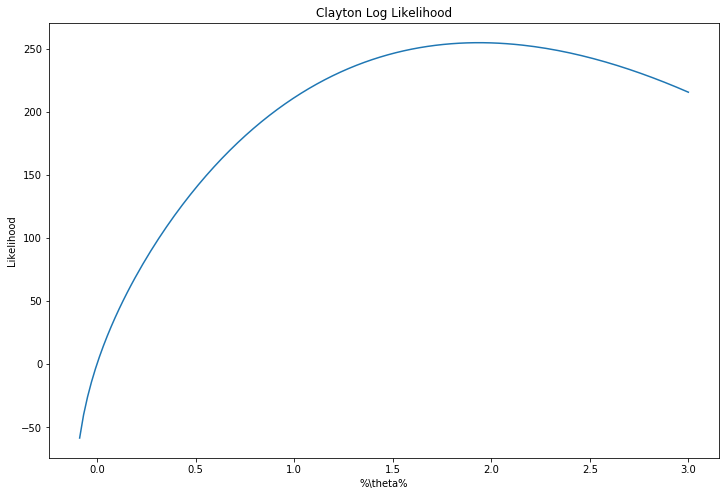

In [301]:
plt.figure(figsize=(12,8))
plt.plot(t_arr,CL)
# plt.plot(t_arr,GL)

plt.title("Clayton Log Likelihood")
plt.xlabel(r"%\theta%")
plt.ylabel("Likelihood")

In [302]:
max_i = np.argmax(CL)
t_arr[max_i]

1.9373366834170855

In [303]:
t_arr[max_i]/(2+t_arr[max_i])

0.492042423391574

In [306]:
tau_1

0.5645552447104593

In [304]:
2*tau_1/(1-tau_1)

2.5930051417662336

In [444]:
class Clayton:
    def __init__(self, theta, Law_RS, Law_RF):
        self.theta = theta     # Dependence Parameter
        self.Law_RS = Law_RS   # Marginal Distribution of Spot
        self.Law_RF = Law_RF   # Marginal Distribution of Future
        
    def phi(self, t):
        A = 1/self.theta
        B = t**(-self.theta)-1
        return A*B
    
    def phi_inverse(self, t):
        A = (1+self.theta*t)
        B = -1/self.theta
        return A**B
    
    def d_phi(self, t):
        return -1/(t**(self.theta+1))
    
    def d_phi_inverse(self, t):
        A = 1+ self.theta*t
        B = (-1/self.theta) - 1
        return self.theta * A**B
    
    def H(self, w, h, r_h): # a helper function to compute the input to F_RF
        A = self.Law_RS.ppf(w) - r_h
        if h!=0:
            B = h
        else:
            B = 0.00001
        return A/B
    
    def g(self, w, h, r_h):
        return self.Law_RF.cdf(self.H(w=w, h=h, r_h=r_h))
    
    def D1C(self, w, h, r_h):
        a = self.phi(w) + self.phi(self.g(w,h,r_h))
        A = self.d_phi_inverse(a)
        B = self.d_phi(w)
        return A*B
        
    def F_RH(self, h, r_h):
        func = partial(self.D1C, h=h, r_h=r_h)
        I = integrate.quad(func, 0.0001, 0.999)
        return 1 - I[0]
    
    def c_for_calibration(self, u, v, theta):
        A = (1+theta)*((u*v)**(-1-theta))
        B = (-1+(u**-theta)+(v**-theta))**(-2-(1/theta))
        return A*B
    
    def canonical_calibrate(self, u, v):
        fn_toopt = lambda theta: -np.sum(np.log(self.c_for_calibration(u, v, theta)))
        result = scipy.optimize.minimize(fn_toopt, x0=0.1, tol=1e-10)
        self.theta = result.x
        return result

In [447]:
C = Clayton(theta=0.1, Law_RS=stats.norm, Law_RF=stats.norm)
C.canonical_calibrate(u,v)

array([0.49207902])

In [427]:
class Gaussian:
    def __init__(self, rho, Law_RS, Law_RF):
        self.rho = rho         # Dependence Parameter
        self.Law_RS = Law_RS   # Marginal Distribution of Spot
        self.Law_RF = Law_RF   # Marginal Distribution of Future
        self.meta_Gaussian = stats.multivariate_normal([0,0], # Mean
                                                       [[1,rho], # COV
                                                        [rho,1]])

    def H(self, w, h, r_h): # a helper function to compute the input to F_RF
        A = self.Law_RS.ppf(w) - r_h
        if h!=0:
            B = h
        else:
            B = 0.00001
        return A/B
    
    def g(self, w, h, r_h):
        return self.Law_RF.cdf(self.H(w=w, h=h, r_h=r_h))
    
    def D1C(self, w, h, r_h):
        integrand = lambda u: self.meta_Gaussian.pdf([norm.ppf(w), u]) 
        part2 = 1/norm.pdf(norm.ppf(w))
        return integrate.quad(integrand, -np.infty, norm.ppf(self.g(w, h, r_h)))[0] * part2
    
    def F_RH(self, h, r_h):
        func = partial(self.D1C, h=h, r_h=r_h)
        I = integrate.quad(func, 0.0001, 0.999)
        return 1 - I[0]
    
    def c(self, u, v): # copula density
        part1 = self.meta_Gaussian.pdf([norm.ppf(u), norm.ppf(v)])
        part2 = norm.pdf(norm.ppf(u))* norm.pdf(norm.ppf(v))
        return part1/part2
    
    def f_RH(self, h, r_h):
        part1 = lambda u: self.c(u, self.g(w=u, h=h, r_h=r_h))
        part2 = lambda u: self.Law_RF.pdf(self.H(w=u, h=h, r_h=r_h))
        integrand = lambda u: part1(u)*part2(u)
        return integrate.quad(integrand, 0.0001, 0.999)[0]/np.abs(h)
        
    def sample(self, n):
        copula_samples = self.meta_Gaussian.rvs(n)
        samples = np.zeros((n,2))
        samples[:,0]=self.Law_RS.ppf(norm.cdf(copula_samples[:,0]))
        samples[:,1]=self.Law_RF.ppf(norm.cdf(copula_samples[:,1]))
        return samples
    
    # likelihood function
    def l_fn(self, rho, u, v):
        _meta_Gaussian = stats.multivariate_normal([0,0], 
                                                  [[1,rho], 
                                                   [rho,1]])
        
        z1 = norm.ppf(u)
        z2 = norm.ppf(v)
        
        part1 = []
        for i in range(len(z1)):
            part1.append(_meta_Gaussian.pdf([z1[i], z2[i]]))
        
        part1 = np.array(part1)
        part2 = norm.pdf(norm.ppf(u))*norm.pdf(norm.ppf(v))
        return np.nanmean(np.log(part1/part2))

    def canonical_calibrate(self, u, v):
        fn_toopt = lambda rho: -self.l_fn(rho, u, v)
        result = scipy.optimize.minimize(fn_toopt, x0=0, tol=1e-10)
        self.rho = result.x
        return result

In [421]:
C = Gaussian(rho=0.1, Law_RS=stats.norm, Law_RF=stats.norm)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


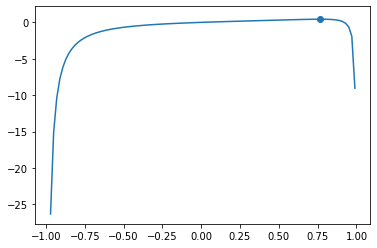

In [423]:
rho_arr = np.linspace(-.99,.99,100)
GausL = []

for rho in rho_arr:
    GausL.append(C.l_fn(rho, u,v))
plt.plot(rho_arr, GausL)

C.calibrate(u,v)
plt.scatter(C.rho, C.l_fn(C.rho, u,v))

In [424]:
C.calibrate(u,v)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


      fun: -0.43660580748397637
 hess_inv: array([[0.10368294]])
      jac: array([1.11758709e-08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 186
      nit: 6
     njev: 58
   status: 2
  success: False
        x: array([0.76821375])

In [408]:
max_i = np.argmax(GausL)
rho_arr[max_i]

0.77

In [418]:
2*np.arcsin(0.76821375)/np.pi

0.5577083891338181

In [10]:
tau_1

0.5645552447104593

In [415]:
def l_fn(rho, u, v):
    _meta_Gaussian = stats.multivariate_normal([0,0], 
                                              [[1,rho], 
                                               [rho,1]])

    z1 = norm.ppf(u)
    z2 = norm.ppf(v)

    part1 = []
    for i in range(len(z1)):
        part1.append(_meta_Gaussian.pdf([z1[i], z2[i]]))

    part1 = np.array(part1)
    part2 = norm.pdf(norm.ppf(u))*norm.pdf(norm.ppf(v))
    return np.nanmean(np.log(part1/part2))


fn_toopt = lambda rho: -l_fn(rho, u, v)
scipy.optimize.minimize(fn_toopt, x0=0, tol=1e-10)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


      fun: -0.43660580748397637
 hess_inv: array([[0.10368294]])
      jac: array([1.11758709e-08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 186
      nit: 6
     njev: 58
   status: 2
  success: False
        x: array([0.76821375])

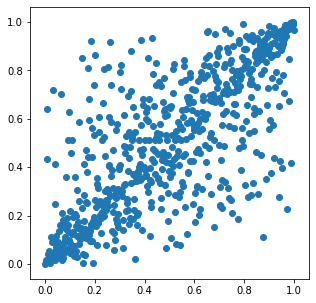

In [426]:
plt.figure(figsize=(5,5))
plt.scatter(u,v)

In [2]:
class t_Copula:
    def __init__(self, rho, nu_meta, nu_inner_1, nu_inner_2, Law_RS, Law_RF):
        self.rho        = rho         # Dependence Parameter
        self.nu_inner_1 = nu_inner_1
        self.nu_inner_2 = nu_inner_2
        self.Law_RS     = Law_RS   # Marginal Distribution of Spot
        self.Law_RF     = Law_RF   # Marginal Distribution of Future
        self.meta_t     = multivariate_t(nu   =nu_meta,  # DF
                                         Sigma=np.array([[1,rho], # COV
                                            [rho,1]]))
        self.t1 = stats.t(df=nu_inner_1) # inner
        self.t2 = stats.t(df=nu_inner_2) # inner
        
    def H(self, w, h, r_h): # a helper function to compute the input to F_RF
        A = self.Law_RS.ppf(w) - r_h
        if h!=0:
            B = h
        else:
            B = 0.00001
        return A/B
    
    def g(self, w, h, r_h):
        return self.Law_RF.cdf(self.H(w=w, h=h, r_h=r_h))
    
    def D1C(self, w, h, r_h):
        integrand = lambda u: self.meta_t.pdf(self.t.ppf(w), u) 
        part2 = 1/self.t.pdf(self.t1.ppf(w))
        return integrate.quad(integrand, -np.infty, self.t2.ppf(self.g(w, h, r_h)))[0] * part2
    
    def F_RH(self, h, r_h):
        func = partial(self.D1C, h=h, r_h=r_h)
        I = integrate.quad(func, 0.0001, 0.999)
        return 1 - I[0]
    
    def c(self, u, v): # copula density
        part1 = self.meta_t.pdf(self.t1.ppf(u), self.t2.ppf(v))
        part2 = self.t1.pdf(self.t1.ppf(u))* self.t2.pdf(self.t2.ppf(v))
        return part1/part2
    
    def f_RH(self, h, r_h):
        part1 = lambda u: self.c(u, self.g(w=u, h=h, r_h=r_h))
        part2 = lambda u: self.Law_RF.pdf(self.H(w=u, h=h, r_h=r_h))
        integrand = lambda u: part1(u)*part2(u)
        return integrate.quad(integrand, 0.0001, 0.999)[0]/np.abs(h)
        
    def sample(self, n):
        copula_samples = self.meta_t.rvs(n)
        samples = np.zeros((n,2))
        samples[:,0]=self.Law_RS.ppf(self.t1.cdf(copula_samples[:,0]))
        samples[:,1]=self.Law_RF.ppf(self.t2.cdf(copula_samples[:,1]))
        return samples
    
        # likelihood function
    def l_fn(self, nu_meta, rho, u, v):
        _meta_t = multivariate_t(nu =nu_meta,  # DF
                                     Sigma=np.array([[1,rho], # COV
                                            [rho,1]]))
        
        z1 = stats.t(df=self.nu_inner_1).ppf(u) # inner
        z2 = stats.t(df=self.nu_inner_2).ppf(v)
        
        part1 = []
        for i in range(len(z1)):
            part1.append(_meta_t.pdf([z1[i], z2[i]]))
        
        part1 = np.array(part1)
        part2 = self.t1.pdf(self.t1.ppf(u))*self.t2.pdf(self.t2.ppf(v))
        return np.nanmean(np.log(part1/part2))

    def canonical_calibrate(self, u, v):
        fn_toopt = lambda rho: -self.l_fn(rho, u, v)
        result = scipy.optimize.minimize(fn_toopt, x0=0, tol=1e-10)
        self.rho = result.x
        return result

In [3]:
from toolbox import *
C = t_Copula(rho=0.1, nu_meta= 4, nu_inner_1=6, nu_inner_2 =8, Law_RS=stats.norm, Law_RF=stats.norm)

In [4]:
C.l_fn(nu_meta=4,rho=0.6,u=u,v=v)

NameError: name 'u' is not defined

In [8]:
%%time
RH = np.linspace(-10,10,100)
density = np.zeros(100)
for i in range(len(RH)):
    density[i] = C.f_RH(1,RH[i])

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_l

CPU times: user 1min 36s, sys: 1.2 s, total: 1min 37s
Wall time: 1min 38s


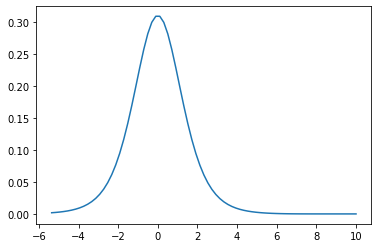

In [9]:
plt.plot(RH, density)

In [16]:
%%time
q_arr = np.linspace(0.001,.99, 99)
stats.t.cdf(stats.t.ppf(q_arr, df=2.), df=2.)  - q_arr

CPU times: user 706 µs, sys: 153 µs, total: 859 µs
Wall time: 739 µs


array([ 1.29002711e-14, -3.91456294e-11, -3.60907138e-12, -6.02844163e-13,
       -1.44211032e-13, -4.49640325e-14, -1.73541737e-14, -7.96585020e-15,
       -4.30211422e-15, -2.55351296e-15, -1.69309011e-15, -1.17961196e-15,
       -9.02056208e-16, -6.93889390e-16, -5.27355937e-16, -4.71844785e-16,
       -3.05311332e-16, -3.05311332e-16, -2.49800181e-16, -1.66533454e-16,
       -1.11022302e-16, -1.66533454e-16,  0.00000000e+00, -5.55111512e-17,
       -1.11022302e-16, -1.11022302e-16,  0.00000000e+00, -5.55111512e-17,
       -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,  0.00000000e+00,
       -5.55111512e-17,  0.00000000e+00,  0.00000000e+00, -5.55111512e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.86188875e-11, -1.07206632e-10, -1.40767009e-10, -1.59689539e-10,
        1.06820219e-10,  6.59085564e-11,  3.62360142e-11,  1.64807612e-11,
        5.11268805e-12,  4.22550883e-13, -6.63358257e-13, -5.98865402e-12,
       -1.81845650e-11, -